In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
df = pd.read_csv('../datasets/sleep_and_activity_dataset.csv')
df.head()

,Person ID,Date,Sleep Duration (hrs),Sleep Efficiency (%),Bed Time,Wake Up Time,Deep Sleep (hrs),Light Sleep (hrs),REM Sleep (hrs),Step Count,Distance Walked/Run (km),Calories Burned,Exercise Duration (min),Time unable to sleep/Others (hrs),Age,Gender,Fitness Age
0,Person_1,2025-05-29,6.763567,76.10,2025-05-31 23:06:00,2025-06-01 05:51:48.842830288,0.970121,2.700219,1.495712,5396,4.2,1833,30,1.597515,56,Male,21
1,Person_2,2025-05-29,7.101986,78.30,2025-05-31 21:41:00,2025-06-01 04:47:07.148024820,0.962702,3.172448,1.634347,3003,2.2,2848,55,1.332489,46,Female,31
2,Person_3,2025-05-29,6.726011,75.96,2025-05-31 23:40:00,2025-06-01 06:23:33.640384918,0.885353,2.813898,1.665220,13734,11.3,2294,42,1.361541,32,Male,35
3,Person_4,2025-05-29,7.179961,78.98,2025-05-31 21:34:00,2025-06-01 04:44:47.859080926,1.045949,2.985220,1.672419,8163,7.4,2835,66,1.476373,60,Female,52
4,Person_5,2025-05-29,6.877313,76.99,2025-05-31 22:55:00,2025-06-01 05:47:38.327794910,1.320055,2.794770,1.558585,12861,9.3,2260,77,1.203904,25,Male,42


In [20]:
df.columns

Index(['Person ID', 'Date', 'Sleep Duration (hrs)', 'Sleep Efficiency (%)',
       'Bed Time', 'Wake Up Time', 'Deep Sleep (hrs)', 'Light Sleep (hrs)',
       'REM Sleep (hrs)', 'Step Count', 'Distance Walked/Run (km)',
       'Calories Burned', 'Exercise Duration (min)',
       'Time unable to sleep/Others (hrs)', 'Age', 'Gender', 'Fitness Age'],
      dtype='object')

In [21]:
df.drop(df.columns[[0,1,2,3,4,5,6,7,8,13]],axis=1,inplace=True)
df.head()

,Step Count,Distance Walked/Run (km),Calories Burned,Exercise Duration (min),Age,Gender,Fitness Age
0,5396,4.2,1833,30,56,Male,21
1,3003,2.2,2848,55,46,Female,31
2,13734,11.3,2294,42,32,Male,35
3,8163,7.4,2835,66,60,Female,52
4,12861,9.3,2260,77,25,Male,42


<Axes: >

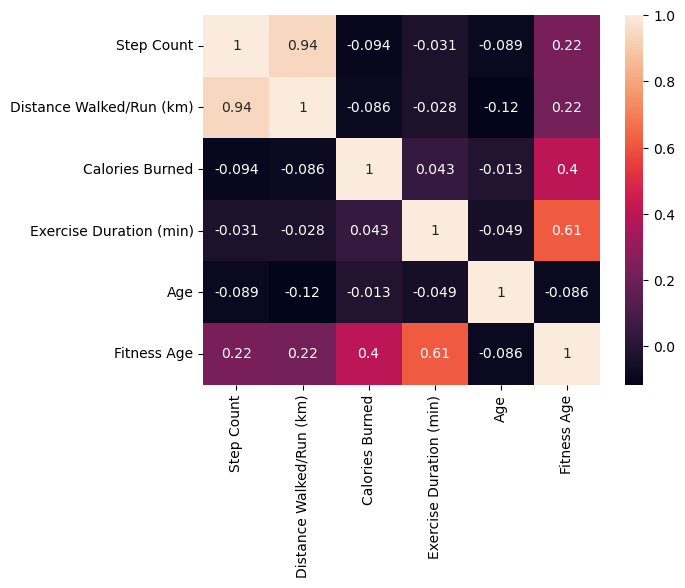

In [22]:
sns.heatmap(df.drop('Gender',axis=1).corr(),annot=True)

In [23]:
def feature_selection(df,threshold):
    corr_matrix = df.corr()
    corr_set = set()
    for i in range(len(df.columns)):
        for j in range(i):
            if (abs(corr_matrix.iloc[i][j]) > threshold):
                corr_set.add(corr_matrix.columns[i])
    return corr_set

excess = feature_selection(df.drop('Gender',axis=1),0.85)
if 'Fitness Age' in excess:
    excess.remove('Fitness Age')

C:\Users\agary\AppData\Local\Temp\ipykernel_17476\3667363875.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (abs(corr_matrix.iloc[i][j]) > threshold):


In [24]:
df.drop(excess,axis=1,inplace=True)

In [25]:
df.head()

,Step Count,Calories Burned,Exercise Duration (min),Age,Gender,Fitness Age
0,5396,1833,30,56,Male,21
1,3003,2848,55,46,Female,31
2,13734,2294,42,32,Male,35
3,8163,2835,66,60,Female,52
4,12861,2260,77,25,Male,42


In [26]:
df.to_csv('../datasets/activity_cleaned.csv',index=False)